In [1]:
import yfinance as yf
import pandas as pd
import zipfile
import json
from lxml import etree
from io import StringIO
from datetime import date
from tqdm.notebook import tqdm
import requests
from matplotlib import pyplot as plt
import seaborn as sns
from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from sklearn.preprocessing import LabelEncoder
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn
import os
import pickle

In [2]:
# Set directory and device
# set device
device = torch.device(0 if torch.cuda.is_available() else -1)
print('Device:', device)

# set directory for data and model
data_dir = 'dataset/'
model_dir = 'model/'
# create directory for data
if not os.path.exists(data_dir):
    os.makedirs(data_dir)
if not os.path.exists(model_dir):
    os.makedirs(model_dir)


Device: cuda:0


In [8]:
# List of tickers / companies
temp = pd.read_csv('dataset/combined_2012-01-01_2022-12-31.csv')
companies = temp['ticker'].unique().tolist()
companies_full_name = temp['company_name'].unique().tolist()


Historical Stock Data

In [34]:
# fetch historical stock data
company_list = companies
start_date = '2012-01-01'
end_date = '2022-12-31'
filename = data_dir + 'historical_stock_data.csv'

def save_historical_data_to_csv(companies, start_date, end_date, filename):
    data = pd.DataFrame()

    for company in companies:
        print(f'Retrieving data for {company}...')
        stock_data = yf.download(company, start=start_date, end=end_date)
        if not stock_data.empty:
            stock_data['Company'] = company
            data = pd.concat([data, stock_data]) 
        else:
            print(f'No data available for {company}.')
        print()

    if not data.empty:
        data.to_csv(filename)
        print(f'Historical stock data saved to {filename}.')
    else:
        print('No data available for any company.')

save_historical_data_to_csv(company_list, start_date, end_date, filename)

Retrieving data for ABNB...
[*********************100%***********************]  1 of 1 completed

Retrieving data for ADD...
[*********************100%***********************]  1 of 1 completed

Retrieving data for AGAE...
[*********************100%***********************]  1 of 1 completed

Retrieving data for AMC...
[*********************100%***********************]  1 of 1 completed

Retrieving data for AMCX...
[*********************100%***********************]  1 of 1 completed

Retrieving data for ANGH...
[*********************100%***********************]  1 of 1 completed

Retrieving data for ANGI...
[*********************100%***********************]  1 of 1 completed

Retrieving data for AREN...
[*********************100%***********************]  1 of 1 completed

Retrieving data for ASST...
[*********************100%***********************]  1 of 1 completed

ERROR 
1 Failed download:
ERROR ['ASST']: Exception("ASST: Data doesn't exist for startDate = 1325394000, endDate = 1672462800")



No data available for ASST.

Retrieving data for ATHM...
[*********************100%***********************]  1 of 1 completed

Retrieving data for BATRK...
[*********************100%***********************]  1 of 1 completed

Retrieving data for BIDU...
[*********************100%***********************]  1 of 1 completed

Retrieving data for BKNG...
[*********************100%***********************]  1 of 1 completed

Retrieving data for BODY...
[*********************100%***********************]  1 of 1 completed

Retrieving data for BOWL...
[*********************100%***********************]  1 of 1 completed

Retrieving data for BREA...
[*********************100%***********************]  1 of 1 completed

ERROR 
1 Failed download:
ERROR ['BREA']: Exception("BREA: Data doesn't exist for startDate = 1325394000, endDate = 1672462800")



No data available for BREA.

Retrieving data for BZFD...
[*********************100%***********************]  1 of 1 completed

Retrieving data for CARG...
[*********************100%***********************]  1 of 1 completed

Retrieving data for CCL...
[*********************100%***********************]  1 of 1 completed

Retrieving data for CMCM...
[*********************100%***********************]  1 of 1 completed

Retrieving data for CNK...
[*********************100%***********************]  1 of 1 completed

Retrieving data for CNVS...
[*********************100%***********************]  1 of 1 completed

Retrieving data for CPOP...
[*********************100%***********************]  1 of 1 completed

Retrieving data for CSSE...
[*********************100%***********************]  1 of 1 completed

Retrieving data for DASH...
[*********************100%***********************]  1 of 1 completed

Retrieving data for DESP...
[*********************100%***********************]  1 of 1 com

ERROR 
1 Failed download:
ERROR ['LGF.A']: Exception('LGF.A: No timezone found, symbol may be delisted')



No data available for LGF.A.

Retrieving data for LIND...
[*********************100%***********************]  1 of 1 completed

Retrieving data for LIZI...
[*********************100%***********************]  1 of 1 completed

Retrieving data for LKCO...
[*********************100%***********************]  1 of 1 completed

Retrieving data for LOV...
[*********************100%***********************]  1 of 1 completed

Retrieving data for LTRPA...
[*********************100%***********************]  1 of 1 completed

Retrieving data for LVO...
[*********************100%***********************]  1 of 1 completed

Retrieving data for LYV...
[*********************100%***********************]  1 of 1 completed

Retrieving data for MANU...
[*********************100%***********************]  1 of 1 completed

Retrieving data for MATH...
[*********************100%***********************]  1 of 1 completed

Retrieving data for MAX...
[*********************100%***********************]  1 of 1 com

ERROR 
1 Failed download:
ERROR ['MSGE']: Exception("MSGE: Data doesn't exist for startDate = 1325394000, endDate = 1672462800")



No data available for MSGE.

Retrieving data for MSGS...
[*********************100%***********************]  1 of 1 completed

Retrieving data for MTCH...
[*********************100%***********************]  1 of 1 completed

Retrieving data for NCLH...
[*********************100%***********************]  1 of 1 completed

Retrieving data for NFLX...
[*********************100%***********************]  1 of 1 completed

Retrieving data for NN...
[*********************100%***********************]  1 of 1 completed

Retrieving data for NWSA...
[*********************100%***********************]  1 of 1 completed

Retrieving data for NXST...
[*********************100%***********************]  1 of 1 completed

Retrieving data for OB...
[*********************100%***********************]  1 of 1 completed

Retrieving data for ONFO...
[*********************100%***********************]  1 of 1 completed

Retrieving data for OPRA...
[*********************100%***********************]  1 of 1 compl

In [61]:
# load stock data from csv file instead of fetching from Yahoo Finance
path = data_dir + 'historical_stock_data.csv'
stock_data = pd.read_csv(path, index_col=0, parse_dates=True)
display(stock_data.head(5))
df_stock = stock_data.copy()
df_stock = df_stock.reset_index()

,Open,High,Low,Close,Adj Close,Volume,Company
Date,,,,,,,
2020-12-10,146.000000,165.000000,141.250000,144.710007,144.710007,70447500,ABNB
2020-12-11,146.550003,151.500000,135.100006,139.250000,139.250000,26980800,ABNB
2020-12-14,135.000000,135.300003,125.160004,130.000000,130.000000,16966100,ABNB
2020-12-15,126.690002,127.599998,121.500000,124.800003,124.800003,10914400,ABNB
2020-12-16,125.830002,142.000000,124.910004,137.990005,137.990005,20409600,ABNB


In [ ]:
# plot historical stock data
plt.figure(figsize=(15, 10))
sns.lineplot(data=df_stock, x='Date', y='Close', hue='Company')
plt.title('Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

In [118]:
# calculate daily returns for each company using pct_change() of closing price
stock_data['daily_return'] = stock_data.groupby('Company')['Close'].pct_change()
display(stock_data[stock_data['Company'] == 'GOOGL'].head(5))
df_stock = stock_data.copy()
df_stock = df_stock.reset_index()

,Open,High,Low,Close,Adj Close,Volume,Company,daily_return
Date,,,,,,,,
2012-01-03,16.339840,16.720470,16.325577,16.651901,16.651901,146912940,GOOGL,NaN
2012-01-04,16.642391,16.773024,16.532032,16.723724,16.723724,114445440,GOOGL,0.004313
2012-01-05,16.569820,16.615866,16.422173,16.491741,16.491741,131184684,GOOGL,-0.013872
2012-01-06,16.495245,16.516518,16.261011,16.266768,16.266768,107608284,GOOGL,-0.013642
2012-01-09,16.178679,16.191191,15.546296,15.577077,15.577077,232671096,GOOGL,-0.042399


In [119]:
df_stock["Date"] = pd.to_datetime(df_stock["Date"])
df_stock = df_stock.set_index("Date")
df_stock_list = []

for company in companies:
    df_stock_company = df_stock[df_stock['Company'] == company]
    # check if dataframes are empty
    if df_stock_company.empty:
        empty_df_stock_company = pd.DataFrame(columns=["monthly_daily_return_median", "Open", "High", "Low", "Close", "Adj Close", "Volume", "Company"], index=pd.to_datetime(["2022-12-31"]))
        # empty_df_stock_company = empty_df_stock_company.append({"monthly_daily_return_median": 0, "Open": 0, "High": 0, "Low": 0, "Close": 0, "Adj Close": 0, "Volume": 0, "Company": company})
        empty_df_stock_company.loc[pd.to_datetime("2022-12-31")] = {"monthly_daily_return_median": 0, "Open": 0, "High": 0, "Low": 0, "Close": 0, "Adj Close": 0, "Volume": 0, "Company": company}
        df_stock_list.append(empty_df_stock_company)
        continue
    df_stock_company_monthly = df_stock_company["daily_return"].resample("M").median()
    df_stock_company_monthly = df_stock_company_monthly.rename("monthly_daily_return_median")
    df_stock_company_monthly_last_date = df_stock_company.resample("M").last()
    df_stock_company_monthly_last_date = df_stock_company_monthly_last_date.drop(columns=["daily_return"])
    df_stock_company = pd.concat([df_stock_company_monthly, df_stock_company_monthly_last_date], axis=1)
    df_stock_list.append(df_stock_company)

df_stock = pd.concat(df_stock_list)
df_stock = df_stock.reset_index()
df_stock = df_stock.rename(columns={"index": "Date"})
print(df_stock.shape)
display(df_stock.head(5))
display(df_stock[df_stock['Company'] == 'ASST'].head())
display(df_stock[df_stock['Company'] == 'GOOGL'].head(10))


(10096, 9)


,Date,monthly_daily_return_median,Open,High,Low,Close,Adj Close,Volume,Company
0,2020-12-31,-0.010724,146.899994,147.889999,144.509995,146.800003,146.800003,2795800,ABNB
1,2021-01-31,0.008149,190.710007,193.5,179.309998,183.630005,183.630005,4529800,ABNB
2,2021-02-28,-0.002744,194.179993,214.100006,185.75,206.350006,206.350006,19368600,ABNB
3,2021-03-31,0.003138,185.429993,192.274994,185.130005,187.940002,187.940002,3079500,ABNB
4,2021-04-30,-0.003774,173.003998,176.449997,172.009995,172.710007,172.710007,3580000,ABNB


,Date,monthly_daily_return_median,Open,High,Low,Close,Adj Close,Volume,Company
754,2022-12-31,0,0,0,0,0,0,0,ASST


,Date,monthly_daily_return_median,Open,High,Low,Close,Adj Close,Volume,Company
3246,2012-01-31,-0.000802,14.58959,14.614615,14.393143,14.517267,14.517267,85610304,GOOGL
3247,2012-02-29,0.001413,15.48048,15.655656,15.402903,15.471722,15.471722,125350524,GOOGL
3248,2012-03-31,0.001801,16.310061,16.353603,16.04104,16.047047,16.047047,92335572,GOOGL
3249,2012-04-30,-0.002909,15.34009,15.417417,15.03028,15.136386,15.136386,96195708,GOOGL
3250,2012-05-31,-0.001363,14.732733,14.764765,14.489489,14.536036,14.536036,118613268,GOOGL
3251,2012-06-30,-0.003636,14.388388,14.517768,14.319319,14.516266,14.516266,100679220,GOOGL
3252,2012-07-31,0.00106,15.722222,15.928428,15.721221,15.84009,15.84009,74549376,GOOGL
3253,2012-08-31,0.002323,17.117117,17.231731,17.018019,17.144394,17.144394,84998916,GOOGL
3254,2012-09-30,0.004035,18.872623,19.001501,18.797548,18.88138,18.88138,111228660,GOOGL
3255,2012-10-31,-0.000521,17.013514,17.042042,16.891891,17.024525,17.024525,61418520,GOOGL


In [ ]:
# plot daily returns 
plt.figure(figsize=(15, 10))
sns.lineplot(data=df_stock, x='Date', y='daily_return', hue='Company')
plt.title('Daily Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.show()

Fetching News Headlines and Sentiment Analysis

In [ ]:
# fetch news headlines from https://www.kaggle.com/code/shtrausslearning/news-sentiment-based-trading-strategy/notebook (this script loads the dataset from a local directory - ./dataset/headlines_archive)
data_df_news = []
data = None 
ret = []
ret_f = []

# helper function performs the jsn parsing 
def jsonParser(json_data): 
    xml_data = json_data['content']
            
    tree = etree.parse(StringIO(xml_data), parser=etree.HTMLParser())

    headlines = tree.xpath("//h4[contains(@class, 'media-heading')]/a/text()")
    assert len(headlines) == json_data['count']

    main_tickers = list(map(lambda x: x.replace('/symbol/', ''), tree.xpath("//div[contains(@class, 'media-left')]//a/@href")))
    assert len(main_tickers) == json_data['count']
    final_headlines = [''.join(f.xpath('.//text()')) for f in tree.xpath("//div[contains(@class, 'media-body')]/ul/li[1]")]
    if len(final_headlines) == 0:
        final_headlines = [''.join(f.xpath('.//text()')) for f in tree.xpath("//div[contains(@class, 'media-body')]")]
        final_headlines = [f.replace(h, '').split('\xa0')[0].strip() for f,h in zip (final_headlines, headlines)]
        
    return main_tickers, final_headlines


with zipfile.ZipFile("./dataset/headlines_archive", "r") as z:
    
    for filename in tqdm(z.namelist()): 
#         print(filename)
        try:               
            #print('Running {}'.format(filename))
            with z.open(filename) as f:  
                data = f.read()  
                json_data = json.loads(data)      
            if json_data.get('count', 0)> 10:
                
                #Step 1: Parse the News Jsons 
                main_tickers, final_headlines = jsonParser(json_data) 
                
                if len(final_headlines) != json_data['count']:
                    continue
                    
                #Step 2: Prepare Future and Event Return and assign Future and Event return for each ticker. 
                file_date = filename.split('/')[-1].replace('.json', '')
                file_date = date(int(file_date[:4]), int(file_date[5:7]), int(file_date[8:]))
                
               #Step 3: Merge all the data in a data frame
                df_dict = {'company': main_tickers,
                           'headline': final_headlines,            
                           'date': [file_date] * len(main_tickers)}
                
                df_f = pd.DataFrame(df_dict)                    
                data_df_news.append(df_f)
                
        except:
            pass  


# merge all dataframes
data_df_news=pd.concat(data_df_news)
# data_df_news = data_df_news[~(data_df_news['company'] == '')] # remove empty company names
data_df_news = data_df_news[data_df_news['company'] != ''] # remove empty company names
print("total news headlines: ", data_df_news.shape)
data_df_news = data_df_news[data_df_news['company'].isin(companies)] # select only companies in our list
data_df_news = data_df_news[data_df_news["headline"] != ""] # remove empty headlines
print("with only selected companies: ",data_df_news.shape)
display(data_df_news.head(5))


In [ ]:
# sentiment analysis on news headlines
tokenizer = AutoTokenizer.from_pretrained("Jean-Baptiste/roberta-large-financial-news-sentiment-en")
sa_roberta = pipeline("sentiment-analysis", model="soleimanian/financial-roberta-large-sentiment", device=device)

batch_size = 64
sentiments = []

for i in range(0, len(data_df_news), batch_size):
    batch = data_df_news['headline'].iloc[i:i+batch_size].tolist()
    results = sa_roberta(batch)
    sentiments.extend([result['label'] for result in results])

data_df_news['sentiment'] = sentiments
display(data_df_news.head(5))
save_dir = data_dir + 'news_headlines_sentiment.csv'
data_df_news.to_csv(save_dir)

In [7]:
# laod news headlines with sentiment from previuously saved csv file
path = data_dir + 'news_headlines_sentiment.csv'
data_df_news = pd.read_csv(path, index_col=0, parse_dates=True)
display(data_df_news.head(5))
df = data_df_news.copy()
df['date'] = pd.to_datetime(df['date'])
le = LabelEncoder()
df['sentiment'] = le.fit_transform(df['sentiment'])
# original sentiment labels
print(le.classes_)

,company,headline,date,sentiment
5,AMZN,Whole Foods (WFMI) -5.2% following a downgrade...,2011-05-02,negative
11,NFLX,Netflix (NFLX +1.1%) shares post early gains a...,2011-05-02,positive
3,MSFT,The likely winners in Microsoft's (MSFT -1.4%)...,2011-05-10,neutral
6,MSFT,Microsoft (MSFT -1.2%) and Skype signed their ...,2011-05-10,positive
5,AMZN,Amazon.com (AMZN -1.7%) shares slip as comment...,2011-05-12,negative


['negative' 'neutral' 'positive']


In [131]:
# load sentiment analysis data
path = data_dir + 'combined_2012-01-01_2022-12-31.csv'
df_sentiment = pd.read_csv(path)
df_sentiment = df_sentiment.rename(columns={"ticker": "Company", "end": "Date"})
df_sentiment['Date'] = df_sentiment['Date'].str[:7] # keep only year and month
df_sentiment['Date'] = pd.to_datetime(df_sentiment['Date']) + pd.offsets.MonthEnd(1) # set date to end of month
display(df_sentiment.head(5))

,Company,start,Date,sentiment_company,industry,sentiment_industry,sentiment,company_name
0,ABNB,2012-01-01,2012-01-31,0.0,travel-services,-0.047717,-0.047717,"Airbnb, Inc."
1,ABNB,2012-02-01,2012-02-29,0.0,travel-services,-0.200013,-0.200013,"Airbnb, Inc."
2,ABNB,2012-03-01,2012-03-31,0.0,travel-services,-0.199878,-0.199878,"Airbnb, Inc."
3,ABNB,2012-04-01,2012-04-30,0.0,travel-services,0.000245,0.000245,"Airbnb, Inc."
4,ABNB,2012-05-01,2012-05-31,0.0,travel-services,0.250073,0.250073,"Airbnb, Inc."


In [ ]:
# plot sentiment distribution for each company
for company in companies:
    plt.figure(figsize=(10, 5))
    sns.lineplot(data=df[df['company'] == company], x='date', y='sentiment')
    plt.title(f'Sentiment Analysis Over Time for {company}')
    plt.xlabel('Date')
    plt.ylabel('Sentiment')
    plt.show()

Merge Stock Data and News Headlines

In [24]:
# merge stock data and news headlines
df_merged = pd.merge(df_stock, df, left_on=['Company', 'Date'], right_on=['company', 'date'], how='inner')
df_merged = df_merged.drop(columns=['Open', 'High', 'Low', 'Close', 'Adj Close', 'Company', 'headline', 'date', 'Volume'])
df_merged = df_merged.set_index('Date') # set date as index

display(df_merged.head(5))
print(df_merged.shape)

,daily_return,company,sentiment
Date,,,
2011-06-07,-0.017749,AAPL,0
2011-06-14,0.017881,AAPL,2
2011-06-20,-0.015425,AAPL,0
2011-07-07,0.015465,AAPL,2
2011-07-13,0.012071,AAPL,2


(3401, 3)


In [479]:
# merge stock data and sentiment analysis
df_merged = pd.merge(df_stock, df_sentiment, left_on=['Company', 'Date'], right_on=['Company', 'Date'], how='inner')
df_merged = df_merged.drop(columns=['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'start'])
df_merged = df_merged.set_index('Date') # set date as index
# fill missing values with 0
df_merged['monthly_daily_return_median'] = df_merged['monthly_daily_return_median'].fillna(0.0)
# move monthly_daily_return_median to the end
temp = df_merged.pop('monthly_daily_return_median')
df_merged['monthly_daily_return_median'] = temp

# # add sample for each company for each months
# temp = df_merged.copy()
# temp = temp.reset_index()
# temp["Date"] = temp["Date"].dt.date
# all_available_dates = temp["Date"].unique()
# df_merged_new = pd.DataFrame(columns=["monthly_daily_return_median",	"Company",	"sentiment_company",	"industry",	"sentiment_industry",	"sentiment",	"company_name"], index=pd.to_datetime(all_available_dates))
# flag = False
# for company in companies:
#     temp_df = df_merged[df_merged["Company"] == company]
#     full_name = temp_df["company_name"].iloc[0]

#     for i in range(len(all_available_dates)):
#         date = all_available_dates[i]
#         if date not in temp_df.index:
#             empty_df = pd.DataFrame(columns=["monthly_daily_return_median",	"Company",	"sentiment_company",	"industry",	"sentiment_industry",	"sentiment",	"company_name"], index=pd.to_datetime([date]))
#             empty_df.loc[pd.to_datetime(date)] = {"monthly_daily_return_median": 0.0,	"Company": company,	"sentiment_company": 0.0,	"industry": 0.0,	"sentiment_industry": 0.0,	"sentiment": 0.0,	"company_name": full_name}
#             temp_df = pd.concat([temp_df, empty_df])

#             print("empty df")
#             display(empty_df.head())
#             print("temp df")
#             display(temp_df.head())
#             flag = True
#         if flag:
#             break
#     if flag:
#         break
        
#     df_merged_new = pd.concat([df_merged_new, temp_df])
# print(df_merged_new.shape)
# display(df_merged_new.head(5))


display(df_merged.head(5))
print(df_merged.shape)



,Company,sentiment_company,industry,sentiment_industry,sentiment,company_name,monthly_daily_return_median
Date,,,,,,,
2020-12-31,ABNB,0.0,travel-services,0.0,0.0,"Airbnb, Inc.",-0.010724
2021-01-31,ABNB,0.0,travel-services,0.0,0.0,"Airbnb, Inc.",0.008149
2021-02-28,ABNB,0.0,travel-services,0.0,0.0,"Airbnb, Inc.",-0.002744
2021-03-31,ABNB,0.0,travel-services,0.0,0.0,"Airbnb, Inc.",0.003138
2021-04-30,ABNB,0.0,travel-services,0.0,0.0,"Airbnb, Inc.",-0.003774


(10096, 7)


In [481]:
# label encode categorical features
le = LabelEncoder()

df_merged['Company'] = le.fit_transform(df_merged['Company'])
original_company_labels = le.classes_
encoded_company_labels = {original_company_labels[i]: i for i in range(len(original_company_labels))}

df_merged["industry"] = le.fit_transform(df_merged["industry"])
original_industry_labels = le.classes_
encoded_industry_labels = {original_industry_labels[i]: i for i in range(len(original_industry_labels))}

df_merged["company_name"] = le.fit_transform(df_merged["company_name"])
original_company_name_labels = le.classes_
encoded_company_full_name_labels = {original_company_name_labels[i]: i for i in range(len(original_company_name_labels))}

df_merged = df_merged.sort_index()

print("company labels: ", encoded_company_labels)
print("industry labels: ", encoded_industry_labels)
print("company full name labels: ", encoded_company_full_name_labels)
display(df_merged.head(5))

company labels:  {'GOOGL': 0}
industry labels:  {'internet-content-and-information': 0}
company full name labels:  {'Alphabet Inc.': 0}


,Company,sentiment_company,industry,sentiment_industry,sentiment,company_name,monthly_daily_return_median
Date,,,,,,,
2012-01-31,0,0.0,0,0.000526,0.000526,0,-0.000802
2012-02-29,0,0.0,0,-0.319921,-0.319921,0,0.001413
2012-03-31,0,0.0,0,0.160699,0.160699,0,0.001801
2012-04-30,0,0.0,0,0.361968,0.361968,0,-0.002909
2012-05-31,0,0.0,0,0.373382,0.373382,0,-0.001363


In [228]:
# train test split
df_train = df_merged[(df_merged.index >= '2012-01-01') & (df_merged.index <= '2019-12-31')]
df_val = df_merged[(df_merged.index >= '2020-01-01') & (df_merged.index <= '2020-12-31')]
df_test = df_merged[(df_merged.index >= '2021-01-01') & (df_merged.index <= '2022-12-31')]

print(df_train.shape)
print(df_val.shape)
print(df_test.shape)

(6093, 7)
(1163, 7)
(2840, 7)


In [480]:
# for training model on specific company, use this code

# data for specific company
company_name = 'GOOGL'
# company_name = 'MSFT'
df_merged = df_merged[df_merged["Company"] == company_name]

# move daily return to the last column
# temp = df_merged.pop('daily_return')
# df_merged['daily_return'] = temp

df_merged = df_merged.sort_index() # sort by date
df_merged = df_merged.dropna() # drop rows with NaN values
# df_merged = df_merged.drop(columns = ["Company"])

display(df_merged.head(5))
print(df_merged.shape)

,Company,sentiment_company,industry,sentiment_industry,sentiment,company_name,monthly_daily_return_median
Date,,,,,,,
2012-01-31,GOOGL,0.0,internet-content-and-information,0.000526,0.000526,Alphabet Inc.,-0.000802
2012-02-29,GOOGL,0.0,internet-content-and-information,-0.319921,-0.319921,Alphabet Inc.,0.001413
2012-03-31,GOOGL,0.0,internet-content-and-information,0.160699,0.160699,Alphabet Inc.,0.001801
2012-04-30,GOOGL,0.0,internet-content-and-information,0.361968,0.361968,Alphabet Inc.,-0.002909
2012-05-31,GOOGL,0.0,internet-content-and-information,0.373382,0.373382,Alphabet Inc.,-0.001363


(132, 7)


Model and Dataset Class

In [461]:
# dataset class
class StockPriceDataset(Dataset):
    def __init__(self, data, window_size, output_dim):
        self.window_size = window_size
        self.data = data
        self.output_dim = output_dim
        self.normalize()
        self.sequenced_data = self.sequence_data()

    def normalize(self):
        self.data["monthly_daily_return_median"] = (self.data["monthly_daily_return_median"] - self.data["monthly_daily_return_median"].mean()) / (self.data["monthly_daily_return_median"].std() + 1e-8)
        self.data["sentiment"] = (self.data["sentiment"] - self.data["sentiment"].mean()) / (self.data["sentiment"].std() + 1e-8)
        self.data["sentiment_company"] = (self.data["sentiment_company"] - self.data["sentiment_company"].mean()) / (self.data["sentiment_company"].std() + 1e-8)
        self.data["sentiment_industry"] = (self.data["sentiment_industry"] - self.data["sentiment_industry"].mean()) / (self.data["sentiment_industry"].std() + 1e-8)

    # create sequences by seperating each month data into seperate sequence
    def sequence_data(self):
        data = self.data
        list_of_df = []
        temp = data.copy()
        temp = temp.reset_index()
        temp["Date"] = pd.to_datetime(temp["Date"])
        all_available_dates = temp["Date"].unique()

        for i in range(len(all_available_dates)):
            date = all_available_dates[i]
            temp_df = data[data.index == date]
            list_of_df.append(temp_df)
        return list_of_df
        

    def __len__(self):
        return len(self.sequenced_data) - self.window_size - self.output_dim + 1

    def __getitem__(self, idx):
        if self.window_size == 1:
            sequences = self.sequenced_data[idx]
            data = sequences
        else:
            sequences = self.sequenced_data[idx: idx + self.window_size -1]
            data = pd.concat(sequences, axis=0)
        # x = data[idx: idx + self.window_size -1].values # sequence of window_size - 1 days
        # y = self.data.iloc[idx + self.window_size -1 : idx + self.window_size -1 + self.output_dim, -1:].values # next output_dim days
        x = data.iloc[:, :-1].values
        if self.window_size == 1:
            sequences_output = self.sequenced_data[idx: idx + self.output_dim]
            data_output = sequences_output[0]
        else:
            sequences_output = self.sequenced_data[idx : idx + self.window_size + self.output_dim - 1]
            data_output = pd.concat(sequences_output, axis=0)
        y = data_output.iloc[:, -1:].values
        return torch.tensor(x).float().to(device), torch.tensor(y).float().to(device)
    
    def return_sequences(self, idx):
        return self.sequenced_data[idx: idx+1]

In [414]:
# LSTM model class
class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(LSTMModel, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True, dropout=0.2, bidirectional=False)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        if torch.isnan(x).any():
            print("x contains NaN")
        _, (hidden_n, _) = self.lstm(x)
        
        out = self.fc(hidden_n[-1, :, :])

        return out 

In [ ]:
# GRU model class
class GRUModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(GRUModel, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        
        self.gru = nn.GRU(input_dim, hidden_dim, num_layers, batch_first=True, dropout=0.2)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        _, hidden_n = self.gru(x)
        out = self.fc(hidden_n[-1, :, :])
        return out 


Create Dataset and DataLoader, Set Hyperparameters and Build Model

In [466]:
# Hyperparameters
window_size = 5  # sequence length for each input of time series data
input_dim = df_merged.shape[1] - 1 # number of features
hidden_dim = 200 # number of hidden units
num_layers = 3 # number of LSTM / GRU layers
output_dim = 1 # predict next specified days 
num_epochs = 10
batch_size = 1
learning_rate = 1e-3
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [482]:
# create dataset and dataloader

# train, validation, test split
# temp = df_merged.iloc[:int(0.8*len(df_merged))]
# train = temp.iloc[:int(0.8*len(temp))]
# val = temp.iloc[int(0.8*len(temp)):]
# test = df_merged.iloc[int(0.8*len(df_merged)):]
train = df_merged[(df_merged.index >= '2012-01-01') & (df_merged.index <= '2019-12-31')]
val = df_merged[(df_merged.index >= '2020-01-01') & (df_merged.index <= '2020-12-31')]
test = df_merged[(df_merged.index >= '2021-01-01') & (df_merged.index <= '2022-12-31')]

# create dataset
train = StockPriceDataset(train, window_size, output_dim)
val = StockPriceDataset(val, window_size, output_dim)
test = StockPriceDataset(test, window_size, output_dim)

# create dataloader
train_loader = DataLoader(train, batch_size=batch_size, shuffle=False)
val_loader = DataLoader(val, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test, batch_size=batch_size, shuffle=False)

# suppress SettingWithCopyWarning
pd.options.mode.chained_assignment = None

In [483]:
# initialize model, loss function, and optimizer
model = LSTMModel(input_dim, hidden_dim, num_layers, output_dim).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


Train Model

In [422]:
def plot_losses(train_losses, val_losses):
    plt.figure(figsize=(10,5))
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title('Training and Validation Losses')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    # plt.savefig("./dump/losses.png")
    # plt.close()

Epoch: 1 	Training Loss: 1.028173 	Validation Loss: 0.899031
Epoch: 2 	Training Loss: 1.037046 	Validation Loss: 0.896948
Epoch: 3 	Training Loss: 1.036265 	Validation Loss: 0.894589
Epoch: 4 	Training Loss: 1.037666 	Validation Loss: 0.898093
Epoch: 5 	Training Loss: 1.030725 	Validation Loss: 0.898745
Epoch: 6 	Training Loss: 1.026907 	Validation Loss: 0.893588
Epoch: 7 	Training Loss: 1.034694 	Validation Loss: 0.894863
Epoch: 8 	Training Loss: 1.029094 	Validation Loss: 0.896229
Epoch: 9 	Training Loss: 1.022467 	Validation Loss: 0.892533
Epoch: 10 	Training Loss: 1.027031 	Validation Loss: 0.892794


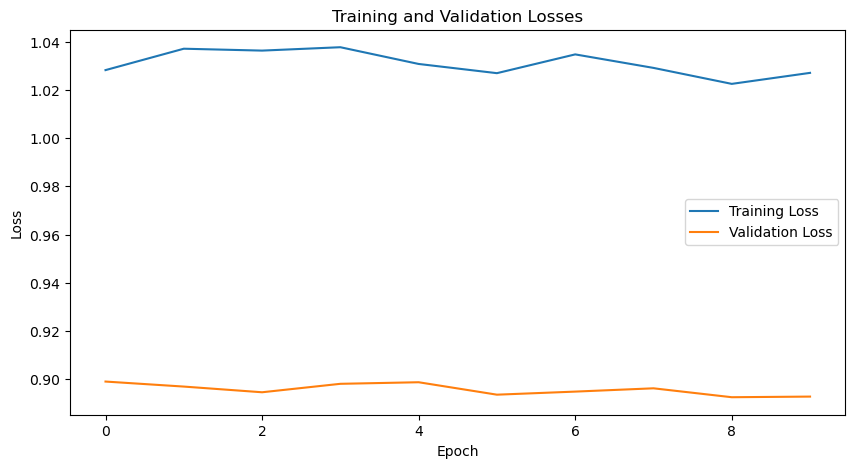

In [484]:
# training loop
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    train_loss = 0.0
    val_loss = 0.0
    num_train_batches = 0
    num_val_batches = 0

    # train model
    model.train()
    for sequence in train_loader:
        inputs, targets = sequence
        targets = targets.squeeze(-1) # remove last dimension

        optimizer.zero_grad()
        output = model(inputs)
        loss = criterion(output, targets)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        num_train_batches += 1
    
    # validate model
    model.eval()
    with torch.no_grad():
        for sequence in val_loader:
            inputs, targets = sequence
            targets = targets.squeeze(-1) # remove last dimension

            output = model(inputs)
            loss = criterion(output, targets)
            
            val_loss += loss.item()
            num_val_batches += 1
    
    train_loss /= num_train_batches
    val_loss /= num_val_batches
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(epoch+1, train_loss, val_loss))
plot_losses(train_losses, val_losses)

In [424]:
# Save the trained model
model_name = 'lstm-'
# company_name = 'apple-'
company_name = 'microsoft-'
predoction_days = '10-'
path = model_dir + model_name + company_name + predoction_days + '.pth'
torch.save(model.state_dict(), path)


In [425]:
# save dataset in pickle file
# test_dataset_name = 'test_dataset.pkl'
test_dataset_name = 'test_dataset-'
# company_name = 'apple-'
company_name = 'microsoft-'
predoction_days = '10-'
path = data_dir + test_dataset_name + company_name + predoction_days + '.pkl'
with open(path, 'wb') as f:
    pickle.dump(test, f)